In [2]:
import math
from matplotlib import pyplot as plt

In [3]:
def plot_stat(data, m_values, serie_names, stats_type, callback=None):
    n = list(range(50, 1001, 50))

    for m in m_values:
        for serie_name in serie_names:
            if callback is not None:
                plt.plot(n, [callback(m,x,y) for x,y in zip(n, data[serie_name][m])], label=f'{serie_name} m={m}')
            else:
                plt.plot(n, data[serie_name][m], label=f'{serie_name} m={m}')

    plt.xlabel('n')
    plt.ylabel(stats_type)
    plt.title(stats_type)
    plt.legend()
    plt.show()


all_data = {}

for stats_type in ['base_max_planar_subgraph_edges', 'base_max_planar_subgraph_ratios', 'base_max_planar_subgraph_times',
    'max_planar_subgraph_edges', 'max_planar_subgraph_ratios', 'max_planar_subgraph_times']:
    series = {
        'bm1': {},
        'bm2': {},
        'm1': {},
        'm2': {},
        'c1': {},
        'c2': {},
    }

    for m in [2, 3, 4, 5]:
        series['bm1'][m] = []
        series['bm2'][m] = []
        series['m1'][m] = []
        series['m2'][m] = []
        series['c1'][m] = []
        series['c2'][m] = []

        with open(f'benchmarks/{stats_type}_m_{m}.txt') as f:
            for line in f.read().splitlines():
                n, bm1, bm2, m1, m2, c1, c2 = map(float, line.split())
                series['bm1'][m].append(bm1)
                series['bm2'][m].append(bm2)
                series['m1'][m].append(m1)
                series['m2'][m].append(m2)
                series['c1'][m].append(c1)
                series['c2'][m].append(c2)

    all_data[stats_type] = series 


# visualise times for each method and m
# for m in [2,3,4,5]:
    # plot_stat(all_data['base_max_planar_subgraph_times'], [m], ['bm1', 'bm2', 'm1', 'm2', 'c1', 'c2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y/x**1)
   
    # plot_stat(all_data['base_max_planar_subgraph_times'], [m], ['bm1', 'bm2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y)
    # plot_stat(all_data['base_max_planar_subgraph_times'], [m], ['bm2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y/x**2)
    # plot_stat(all_data['base_max_planar_subgraph_times'], [m], ['m1', 'm2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y)
    # plot_stat(all_data['base_max_planar_subgraph_times'], [m], ['m2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y/(x*math.log(x)))
    # plot_stat(all_data['base_max_planar_subgraph_times'], [m], ['c1', 'c2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y)
    # plot_stat(all_data['base_max_planar_subgraph_times'], [m], ['c2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y/(x*math.log(x)**2))

    # plot_stat(all_data['max_planar_subgraph_times'], [m], ['bm1', 'bm2', 'm1', 'm2', 'c1', 'c2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y/x**2)

    # plot_stat(all_data['max_planar_subgraph_times'], [m], ['bm1', 'bm2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y)
    # plot_stat(all_data['max_planar_subgraph_times'], [m], ['bm2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y/x**2)
    # plot_stat(all_data['max_planar_subgraph_times'], [m], ['m1', 'm2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y)
    # plot_stat(all_data['max_planar_subgraph_times'], [m], ['m2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y/x**2)
    # plot_stat(all_data['max_planar_subgraph_times'], [m], ['c1', 'c2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y)
    # plot_stat(all_data['max_planar_subgraph_times'], [m], ['c2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y/x**2)


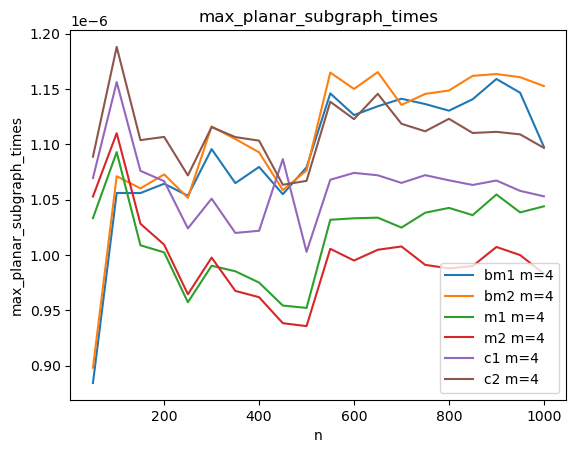

In [4]:
plot_stat(all_data['max_planar_subgraph_times'], [4], ['bm1', 'bm2', 'm1', 'm2', 'c1', 'c2'], 'max_planar_subgraph_times', callback=lambda m,x,y: y/x**2)

for m in [2,3,4,5]:
    with open(f'benchmarks/max_planar_subgraph_times_m_{m}_processed.txt', 'w') as f:
        f.write('n a1 b1 a2 b2 a3 b3\n')
        for i, n in enumerate(range(50, 1001, 50)):
            bm1, bm2 = all_data['max_planar_subgraph_times']['bm1'][m][i], all_data['max_planar_subgraph_times']['bm2'][m][i]
            m1, m2 = all_data['max_planar_subgraph_times']['m1'][m][i], all_data['max_planar_subgraph_times']['m2'][m][i]
            c1, c2 = all_data['max_planar_subgraph_times']['c1'][m][i], all_data['max_planar_subgraph_times']['c2'][m][i]
            f.write(f'{n} {bm1 / n**2} {bm2 / n**2} {m1 / n**2} {m2 / n**2} {c1 / n**2} {c2 / n**2}\n')

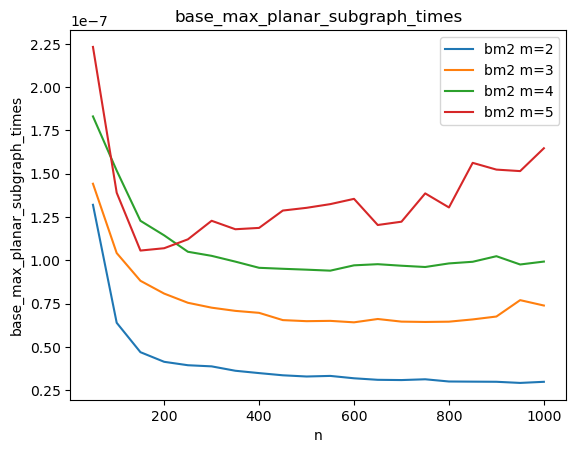

In [5]:
plot_stat(all_data['base_max_planar_subgraph_times'], [2, 3, 4, 5], ['bm2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y/x**1.6)

with open(f'benchmarks/base_max_planar_subgraph_times_bm.txt', 'w') as f:
    f.write('n ')
    for m in [2, 3, 4, 5]:
        f.write(f'm{m}_1 m{m}_2 ')
    f.write('\n')

    for i, n in enumerate(range(50, 1001, 50)):
        f.write(f'{n} ')
        for m in [2, 3, 4, 5]:
            m1, m2 = all_data['base_max_planar_subgraph_times']['bm1'][m][i], all_data['base_max_planar_subgraph_times']['bm2'][m][i]
            f.write(f'{m1 / n**1.6} {m2 / n**1.6} ')
        f.write('\n')

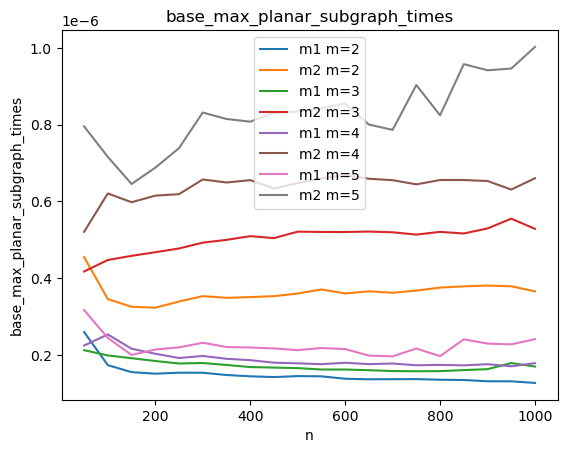

In [6]:
plot_stat(all_data['base_max_planar_subgraph_times'], [2, 3, 4, 5], ['m1', 'm2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y/x**1)

with open(f'benchmarks/base_max_planar_subgraph_times_mst.txt', 'w') as f:
    f.write('n ')
    for m in [2, 3, 4, 5]:
        f.write(f'm{m}_1 m{m}_2 ')
    f.write('\n')

    for i, n in enumerate(range(50, 1001, 50)):
        f.write(f'{n} ')
        for m in [2, 3, 4, 5]:
            m1, m2 = all_data['base_max_planar_subgraph_times']['m1'][m][i], all_data['base_max_planar_subgraph_times']['m2'][m][i]
            f.write(f'{m1 / n**1} {m2 / n**1} ')
        f.write('\n')

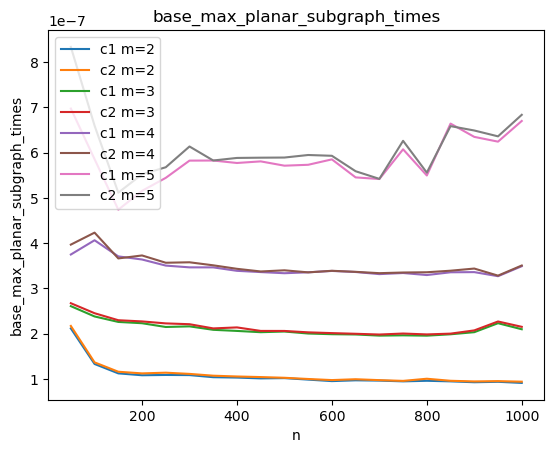

In [7]:
plot_stat(all_data['base_max_planar_subgraph_times'], [2, 3, 4, 5], ['c1', 'c2'], 'base_max_planar_subgraph_times', callback=lambda m,x,y: y/(x * math.log(x)**2))

with open(f'benchmarks/base_max_planar_subgraph_times_cactus.txt', 'w') as f:
    f.write('n ')
    for m in [2, 3, 4, 5]:
        f.write(f'm{m}_1 m{m}_2 ')
    f.write('\n')

    for i, n in enumerate(range(50, 1001, 50)):
        f.write(f'{n} ')
        for m in [2, 3, 4, 5]:
            m1, m2 = all_data['base_max_planar_subgraph_times']['c1'][m][i], all_data['base_max_planar_subgraph_times']['c2'][m][i]
            f.write(f'{m1 / (n * math.log(n)**2)} {m2 / (n * math.log(n)**2)} ')
        f.write('\n')

In [8]:
max_planar_subgraph_edges = {}
for m in [2, 3, 4, 5]:
    max_planar_subgraph_edges[m] = []
    with open(f'benchmarks/max_planar_subgraph_edges_m_{m}.txt') as f:
        for line in f.read().splitlines():
            n, a1, b1, a2, b2, a3, b3 = map(float, line.split())
            max_planar_subgraph_edges[m].append([n, a1, b1, a2, b2, a3, b3])

# process max_planar_subgraph_edges to incrementall add edges
for m in [2, 3, 4, 5]:
    with open(f'benchmarks/max_planar_subgraph_edges_m_{m}_incremental.txt', 'w') as f:
        f.write(f'n a1 b1 a2 b2 a3 b3\n')
        for (n, a1, b1, a2, b2, a3, b3) in max_planar_subgraph_edges[m]:
            f.write(f'{n} {a1} {b1-a1} {a2} {b2-a2} {a3} {b3-a3}\n')

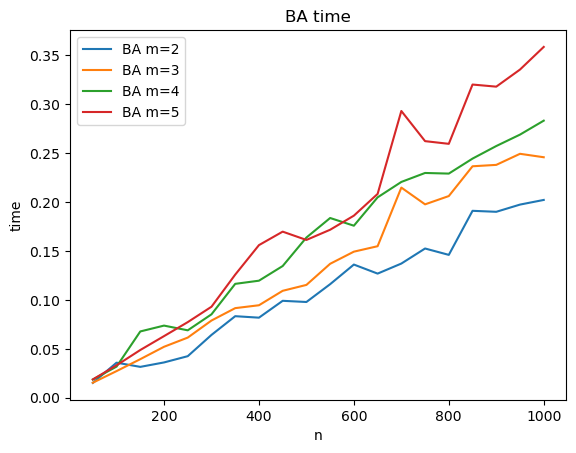

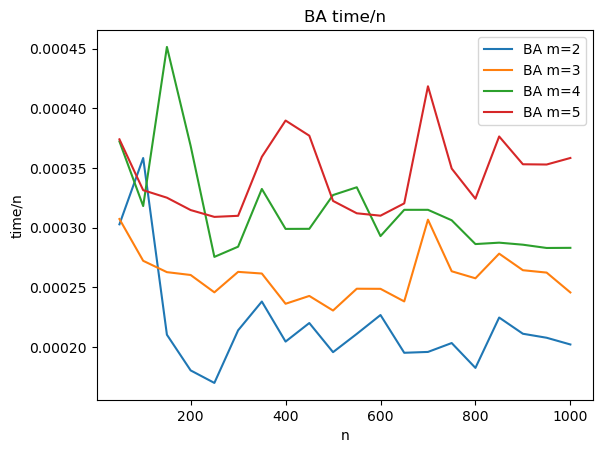

In [9]:
ba_time_series = {}
for m in [2, 3, 4, 5]:
    ba_time_series[m] = []
    with open(f'benchmarks/ba_time_m_{m}.txt') as f:
        for line in f.read().splitlines():
            n, time = map(float, line.split())
            ba_time_series[m].append(time)

for m in [2, 3, 4, 5]:
    plt.plot(list(range(50, 1001, 50)), ba_time_series[m], label=f'BA m={m}')

plt.xlabel('n')
plt.ylabel('time')
plt.title('BA time')
plt.legend()
plt.show()


# process values from x, y to x, y/x
processed_ba_time_series = {}
for m in [2, 3, 4, 5]:
    processed_ba_time_series[m] = []
    with open(f'benchmarks/ba_time_m_{m}_processed.txt', 'w') as f:
        f.write('n t\n')
        for x, y in zip(range(50, 1001, 50), ba_time_series[m]):
            processed_ba_time_series[m].append(y / x)
            f.write(f'{x} {y / x}\n')

for m in [2, 3, 4, 5]:
    plt.plot(list(range(50, 1001, 50)), processed_ba_time_series[m], label=f'BA m={m}')
    
plt.xlabel('n')
plt.ylabel('time/n')
plt.title('BA time/n')
plt.legend()
plt.show()

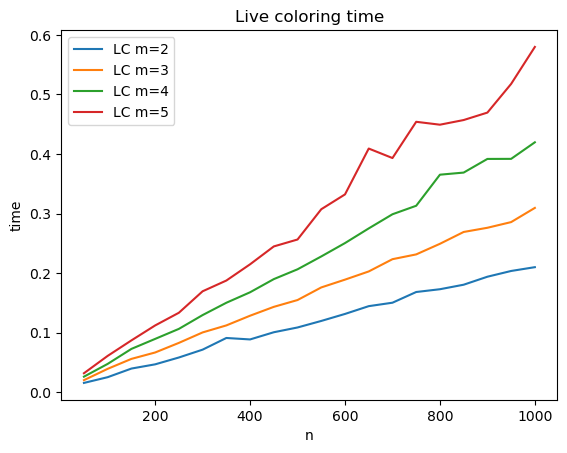

In [10]:
all_data = {}
for m in [2, 3, 4, 5]:
    with open(f'benchmarks/live_coloring2_times_m_{m}.txt') as f:
        all_data[m] = []
        for line in f.read().splitlines():
            n, time = map(float, line.split())
            all_data[m].append(time)


for m in [2, 3, 4, 5]:
    plt.plot(list(range(50, 1001, 50)), all_data[m], label=f'LC m={m}')

plt.xlabel('n')
plt.ylabel('time')
plt.title('Live coloring time')
plt.legend()
plt.show()

with open('live_coloring.txt', 'w') as f:
    f.write('n t2 t3 t4 t5\n')
    for i, n in enumerate(range(50, 1001, 50)):
        f.write(f'{n} ')
        for m in [2, 3, 4, 5]:
            f.write(f'{all_data[m][i] / n} ')
        f.write('\n')